In [5]:
import pandas as pd
import re
import pickle
import numpy as np

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [11]:
df = pd.read_csv("../Data_json_csv/Twitter/P_5_Nov_14_Nov.csv", encoding="Latin1")

In [12]:
df

,user,fullname,tweet-id,timestamp,url,likes,replies,retweets,text,html,step1,stem,lem,cap,pos
0,fdgrant,doug grant,1061770546021625856,2018-11-11 23:59:59,/fdgrant/status/1061770546021625856,0,1,0,You should go for the holy grail and get @RayD...,"<p class=""TweetTextSize js-tweet-text tweet-te...",You go holy grail get show He s skeptic bi...,you go holi grail get show He s skeptic bitcoi...,You go holy grail get show He s skeptic bitcoi...,YOU GO HOLY GRAIL GET SHOW HE S SKEPTIC BITCOI...,"[('You', 'PRP'), ('go', 'VBP'), ('holy', 'JJ')..."
1,AuthorityNomad,Bruce Stewart,1061770543311900672,2018-11-11 23:59:58,/AuthorityNomad/status/1061770543311900672,1,0,0,What Bear Market? Major Bitcoin Mining Farm Go...,"<p class=""TweetTextSize js-tweet-text tweet-te...",What Bear Market Major Bitcoin Mining Farm Go...,what bear market major bitcoin mine farm goe l...,What Bear Market Major Bitcoin Mining Farm Goe...,WHAT BEAR MARKET MAJOR BITCOIN MINING FARM GOE...,"[('What', 'WP'), ('Bear', 'NNP'), ('Market', '..."
2,JASF_MS03,Slinxs,1061770509220749317,2018-11-11 23:59:50,/JASF_MS03/status/1061770509220749317,0,0,0,Bitcoin Mining Giant Bitmain Sues Ã¢ÂÂJohn D...,"<p class=""TweetTextSize js-tweet-text tweet-te...",Bitcoin Mining Giant Bitmain Sues John Doe ...,bitcoin mine giant bitmain sue john doe binanc...,Bitcoin Mining Giant Bitmain Sues John Doe Bin...,BITCOIN MINING GIANT BITMAIN SUES JOHN DOE BIN...,"[('Bitcoin', 'NNP'), ('Mining', 'NNP'), ('Gian..."
3,pn2_sld_pn,Ã£ÂÂÃ£ÂÂ³Ã£ÂÂµÃ£ÂÂ©,1061770505907126272,2018-11-11 23:59:50,/pn2_sld_pn/status/1061770505907126272,0,0,0,Ã£ÂÂÃ£ÂÂ¼BTCÃ£ÂÂªÃ£ÂÂÃ£ÂÂ£Ã£ÂÂ¦Ã£ÂÂÃ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",BTC ...,btc,BTC,BTC,"[('BTC', 'NN')]"
4,bitcoin_renaiw,Ã£ÂÂKJÃ£ÂÂÃ¦ÂÂÃ¨Â³ÂÃ§Â³Â»Ã¥ÂÂÃ¥Â¼Â·Ã¤...,1061770504644640768,2018-11-11 23:59:49,/bitcoin_renaiw/status/1061770504644640768,0,0,0,Ã£ÂÂ¤Ã£ÂÂÃ£ÂÂÃ¯Â½ÂÃ¯Â½ÂÃ¯Â½Âpic.twitte...,"<p class=""TweetTextSize js-tweet-text tweet-te...",pic twitter com hy G T Rzp,pic twitter com hy G T rzp,pic twitter com hy G T Rzp,PIC TWITTER COM HY G T RZP,"[('pic', 'NN'), ('twitter', 'NN'), ('com', 'NN..."
5,BotMarkets,crypto_markets_bot,1061770503281496064,2018-11-11 23:59:49,/BotMarkets/status/1061770503281496064,0,0,0,Ã§ÂÂ´Ã¨Â¿Â1Ã¦ÂÂÃ©ÂÂÃ£ÂÂ«Ã£ÂÂÃ£ÂÂÃ£Â...,"<p class=""TweetTextSize js-tweet-text tweet-te...",BTC JPY ...,btc jpi pic twitter com hehnh tlk,BTC JPY pic twitter com hehnH TlK,BTC JPY PIC TWITTER COM HEHNH TLK,"[('BTC', 'NNP'), ('JPY', 'NNP'), ('pic', 'NN')..."
6,LLord2099,ÃÂ Ã¢ÂÂÃ¯Â¸ÂNu-Blockchain MathematicsÃÂ Ã...,1061770468993236993,2018-11-11 23:59:41,/LLord2099/status/1061770468993236993,1,0,0,Omfg finally we r close to $btc capitulation.\...,"<p class=""TweetTextSize js-tweet-text tweet-te...",Omfg finally r close btc capitulation Goku D...,omfg final r close btc capitul goku decemb,Omfg finally r close btc capitulation Goku Dec...,OMFG FINALLY R CLOSE BTC CAPITULATION GOKU DEC...,"[('Omfg', 'NNP'), ('finally', 'RB'), ('r', 'VB..."
7,CryptoPriceBot_,CryptoPriceBot_,1061770460076089344,2018-11-11 23:59:39,/CryptoPriceBot_/status/1061770460076089344,0,0,0,"BTC,ETH,XRP\r\r\nLast: 6458.10, 213.00, 0.51\r...","<p class=""TweetTextSize js-tweet-text tweet-te...",BTC ETH XRP Last High ...,btc eth xrp last high low total usdt btc bitco...,BTC ETH XRP Last High Low Total USDT BTC bitco...,BTC ETH XRP LAST HIGH LOW TOTAL USDT BTC BITCO...,"[('BTC', 'NNP'), ('ETH', 'NNP'), ('XRP', 'NNP'..."
8,olga651,olga,1061770455315611649,2018-11-11 23:59:37,/olga651/status/1061770455315611649,1,0,0,CryptoRevolution!\r\r\n Sto minando da 1 setti...,"<p class=""TweetTextSize js-tweet-text tweet-te...",CryptoRevolution Sto minando da settimana ...,cryptorevolut sto minando da settimana ogni gi...,CryptoRevolution Sto minando da settimana Ogni...,CRYPTOREVOLUTION STO MINANDO DA SETTIMANA OGNI...,"[('CryptoRevolution', 'NNP'), ('Sto', 'NNP'), ..."
9,MurielRoddam,Muriel Roddam,1061770428442730507,2018-11-

In [13]:
print(df.shape)
df.dropna(subset=['step1'], inplace=True)
print(df.shape)

(151338, 15)
(151322, 15)


In [9]:
# # filter data
# df = df[df.likes > 0]
# df = df[df.replies > 0]
# df = df[df.retweets > 0]
# df.head()
# df.reset_index(inplace = True, drop = True)
# print(df.shape)

(6144, 15)


In [14]:
X_test = df.loc[:, "step1"]
X_test
count = 0
for index, x in enumerate(X_test):
    if type(x) is not str:
        print(x, index)
        count += 1
        
print(count)

0


### Tokenize input text

In [15]:
print(type(X_test))
# X_test = str(X_test)

<class 'pandas.core.series.Series'>


In [16]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(X_test.values)
X = tokenizer.texts_to_sequences(X_test.values)
X = pad_sequences(X, maxlen=200) # padding our text vector so they all have the same length
print(tokenizer.word_index)
print(X)
# type(X[:10])



{'bitcoin': 1, 'btc': 2, 'twitter': 3, 'com': 4, 'crypto': 5, 'pic': 6, 'eth': 7, 'blockchain': 8, 'cryptocurrency': 9, 'i': 10, 's': 11, 'ethereum': 12, 'price': 13, 'buy': 14, 'xrp': 15, 'the': 16, 'cash': 17, 'bch': 18, 'sell': 19, 'a': 20, 'ltc': 21, 'money': 22, 'x': 23, 'ratio': 24, 'to': 25, 'trading': 26, 'get': 27, 'binance': 28, 'usd': 29, 'ico': 30, 'xlm': 31, 'mining': 32, 'it': 33, 'free': 34, 'market': 35, 'neo': 36, 'eos': 37, 'here': 38, 'in': 39, 'new': 40, 'exchange': 41, 't': 42, 'de': 43, 'fork': 44, 'bitmex': 45, 'm': 46, 'h': 47, 'e': 48, 'leverage': 49, 'news': 50, 'ada': 51, 'fee': 52, 'you': 53, 'via': 54, 'dash': 55, 'click': 56, 'join': 57, 'trx': 58, 'omg': 59, 'litecoin': 60, 'and': 61, 'even': 62, 'etc': 63, 'ripple': 64, 'ref': 65, 'for': 66, 'time': 67, 'one': 68, 'make': 69, 'this': 70, 'of': 71, 'is': 72, 'n': 73, 'd': 74, 'like': 75, 'on': 76, 'coin': 77, 'long': 78, 'yobit': 79, 'k': 80, 'b': 81, 'c': 82, 'cryptocurrencies': 83, 'now': 84, 'r': 85, '

In [17]:
X.shape

(151322, 200)

### Load Model

In [18]:
with open("model_twitter_200", "rb") as f:
    mp = pickle.load(f)

In [19]:
predictions = mp.predict(X)

In [20]:
df['Labels (-2 to 2)'] = 0
df
# reset index


,user,fullname,tweet-id,timestamp,url,likes,replies,retweets,text,html,step1,stem,lem,cap,pos,Labels (-2 to 2)
0,fdgrant,doug grant,1061770546021625856,2018-11-11 23:59:59,/fdgrant/status/1061770546021625856,0,1,0,You should go for the holy grail and get @RayD...,"<p class=""TweetTextSize js-tweet-text tweet-te...",You go holy grail get show He s skeptic bi...,you go holi grail get show He s skeptic bitcoi...,You go holy grail get show He s skeptic bitcoi...,YOU GO HOLY GRAIL GET SHOW HE S SKEPTIC BITCOI...,"[('You', 'PRP'), ('go', 'VBP'), ('holy', 'JJ')...",0
1,AuthorityNomad,Bruce Stewart,1061770543311900672,2018-11-11 23:59:58,/AuthorityNomad/status/1061770543311900672,1,0,0,What Bear Market? Major Bitcoin Mining Farm Go...,"<p class=""TweetTextSize js-tweet-text tweet-te...",What Bear Market Major Bitcoin Mining Farm Go...,what bear market major bitcoin mine farm goe l...,What Bear Market Major Bitcoin Mining Farm Goe...,WHAT BEAR MARKET MAJOR BITCOIN MINING FARM GOE...,"[('What', 'WP'), ('Bear', 'NNP'), ('Market', '...",0
2,JASF_MS03,Slinxs,1061770509220749317,2018-11-11 23:59:50,/JASF_MS03/status/1061770509220749317,0,0,0,Bitcoin Mining Giant Bitmain Sues Ã¢ÂÂJohn D...,"<p class=""TweetTextSize js-tweet-text tweet-te...",Bitcoin Mining Giant Bitmain Sues John Doe ...,bitcoin mine giant bitmain sue john doe binanc...,Bitcoin Mining Giant Bitmain Sues John Doe Bin...,BITCOIN MINING GIANT BITMAIN SUES JOHN DOE BIN...,"[('Bitcoin', 'NNP'), ('Mining', 'NNP'), ('Gian...",0
3,pn2_sld_pn,Ã£ÂÂÃ£ÂÂ³Ã£ÂÂµÃ£ÂÂ©,1061770505907126272,2018-11-11 23:59:50,/pn2_sld_pn/status/1061770505907126272,0,0,0,Ã£ÂÂÃ£ÂÂ¼BTCÃ£ÂÂªÃ£ÂÂÃ£ÂÂ£Ã£ÂÂ¦Ã£ÂÂÃ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",BTC ...,btc,BTC,BTC,"[('BTC', 'NN')]",0
4,bitcoin_renaiw,Ã£ÂÂKJÃ£ÂÂÃ¦ÂÂÃ¨Â³ÂÃ§Â³Â»Ã¥ÂÂÃ¥Â¼Â·Ã¤...,1061770504644640768,2018-11-11 23:59:49,/bitcoin_renaiw/status/1061770504644640768,0,0,0,Ã£ÂÂ¤Ã£ÂÂÃ£ÂÂÃ¯Â½ÂÃ¯Â½ÂÃ¯Â½Âpic.twitte...,"<p class=""TweetTextSize js-tweet-text tweet-te...",pic twitter com hy G T Rzp,pic twitter com hy G T rzp,pic twitter com hy G T Rzp,PIC TWITTER COM HY G T RZP,"[('pic', 'NN'), ('twitter', 'NN'), ('com', 'NN...",0
5,BotMarkets,crypto_markets_bot,1061770503281496064,2018-11-11 23:59:49,/BotMarkets/status/1061770503281496064,0,0,0,Ã§ÂÂ´Ã¨Â¿Â1Ã¦ÂÂÃ©ÂÂÃ£ÂÂ«Ã£ÂÂÃ£ÂÂÃ£Â...,"<p class=""TweetTextSize js-tweet-text tweet-te...",BTC JPY ...,btc jpi pic twitter com hehnh tlk,BTC JPY pic twitter com hehnH TlK,BTC JPY PIC TWITTER COM HEHNH TLK,"[('BTC', 'NNP'), ('JPY', 'NNP'), ('pic', 'NN')...",0
6,LLord2099,ÃÂ Ã¢ÂÂÃ¯Â¸ÂNu-Blockchain MathematicsÃÂ Ã...,1061770468993236993,2018-11-11 23:59:41,/LLord2099/status/1061770468993236993,1,0,0,Omfg finally we r close to $btc capitulation.\...,"<p class=""TweetTextSize js-tweet-text tweet-te...",Omfg finally r close btc capitulation Goku D...,omfg final r close btc capitul goku decemb,Omfg finally r close btc capitulation Goku Dec...,OMFG FINALLY R CLOSE BTC CAPITULATION GOKU DEC...,"[('Omfg', 'NNP'), ('finally', 'RB'), ('r', 'VB...",0
7,CryptoPriceBot_,CryptoPriceBot_,1061770460076089344,2018-11-11 23:59:39,/CryptoPriceBot_/status/1061770460076089344,0,0,0,"BTC,ETH,XRP\r\r\nLast: 6458.10, 213.00, 0.51\r...","<p class=""TweetTextSize js-tweet-text tweet-te...",BTC ETH XRP Last High ...,btc eth xrp last high low total usdt btc bitco...,BTC ETH XRP Last High Low Total USDT BTC bitco...,BTC ETH XRP LAST HIGH LOW TOTAL USDT BTC BITCO...,"[('BTC', 'NNP'), ('ETH', 'NNP'), ('XRP', 'NNP'...",0
8,olga651,olga,1061770455315611649,2018-11-11 23:59:37,/olga651/status/1061770455315611649,1,0,0,CryptoRevolution!\r\r\n Sto minando da 1 setti...,"<p class=""TweetTextSize js-tweet-text tweet-te...",CryptoRevolution Sto minando da settimana ...,cryptorevolut sto minando da settimana ogni gi...,CryptoRevolution Sto minando da settimana Ogni...,CRYPTOREVOLUTION STO MINANDO DA SETTIMANA OGNI...,"[('CryptoRevolution', 'NNP'), ('Sto', 'NNP'), ...",0
9,MurielRoddam,Muriel 

In [21]:
df.reset_index(inplace = True, drop = True)

In [22]:
label = 0
l = []
count = 0
for i, prediction in enumerate(predictions):
    
    if np.argmax(prediction) == 0:
        label = -2
    elif np.argmax(prediction) == 1:
        label = -1
    elif np.argmax(prediction) == 2:
        label = 0
    elif np.argmax(prediction) == 3:
        label = 1
    else:
        label = 2
    l.append(label)
    df['Labels (-2 to 2)'][count] = label
    count += 1

c:\python36\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
df.to_csv("..\Data_json_csv\Twitter\LP_5_Nov_14_Nov.csv", index=False)

In [24]:
predictions

array([[5.0123017e-05, 1.0282800e-04, 9.9908137e-01, 7.0964242e-04,
        5.6091125e-05],
       [1.2383799e-03, 4.2441054e-03, 9.7003204e-01, 2.3510937e-02,
        9.7456767e-04],
       [3.6696455e-04, 8.3253544e-04, 9.9272871e-01, 5.7544331e-03,
        3.1744357e-04],
       ...,
       [1.8485181e-02, 1.3138121e-01, 4.9485022e-01, 3.4532779e-01,
        9.9555487e-03],
       [8.1977792e-05, 1.5634601e-04, 9.9849260e-01, 1.1842898e-03,
        8.4794388e-05],
       [4.5725238e-03, 2.6436770e-02, 8.7371242e-01, 9.1931172e-02,
        3.3470960e-03]], dtype=float32)

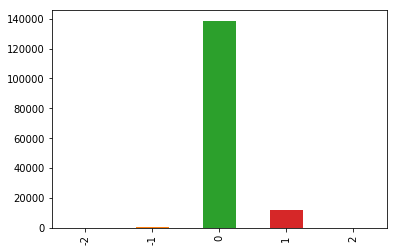

In [29]:
df['Labels (-2 to 2)'].value_counts().sort_index().plot.bar()


In [30]:
l

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [31]:
# commet

In [32]:
# df